In [1]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
from utils import ExperimentManager

import matplotlib.pyplot as plt
import numpy as np

gcn_exp = dict(
    label = "GCN",
    collection = "rob_csbm_gcn",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
appnp_exp = dict(
    label = "APPNP",
    collection = "rob_csbm_appnp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gat_exp = dict(
    label = "GAT",
    collection = "rob_csbm_gat",
    start_id = [1, 301],
    end_id = [180, 440],
    n_seeds = 10,
)
gatv2_exp = dict(
    label = "GATv2",
    collection = "rob_csbm_gatv2",
    start_id = [1, 241],
    end_id = [180, 380],
    n_seeds = 10,
)
graphsage_exp = dict(
    label = "GraphSAGE",
    collection = "rob_csbm_graphsage",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
sgc_exp = dict(
    label="SGC",
    collection="rob_csbm_sgc",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
lp_exp = dict(
    label = "LP",
    collection = "rob_csbm_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
mlp_exp = dict(
    label = "MLP",
    collection = "rob_csbm_mlp",
    start_id = [1, 251],
    end_id = [240, 330],
    n_seeds = 10,
)
gcn_lp_exp = dict(
    label = "GCN+LP",
    collection = "rob_csbm_gcn_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
lineargcn_lp_exp = dict(
    label="LinearGCN",
    collection="rob_csbm_lineargcn",
    start_id = 1,
    end_id = 300,
    n_seeds = 10,
)
sgc_lp_exp = dict(
    label="SGC+LP",
    collection="rob_csbm_sgc_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
appnp_lp_exp = dict(
    label = "APPNP+LP",
    collection = "rob_csbm_appnp_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gat_lp_exp = dict(
    label = "GAT+LP",
    collection = "rob_csbm_gat_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gatv2_lp_exp = dict(
    label = "GATv2+LP",
    collection = "rob_csbm_gatv2_lp",
    start_id = 1,
    end_id =  320,
    n_seeds = 10,
)
graphsage_lp_exp = dict(
    label = "GraphSAGE+LP",
    collection = "rob_csbm_graphsage_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
mlp_lp_exp = dict(
    label = "MLP+LP",
    collection = "rob_csbm_mlp_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)

In [3]:
#This notebook is used to analyse the over- and under-robustness of models. 
Ks = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]

experiments = [mlp_exp,
               gcn_exp,
               #lineargcn_exp,
               sgc_exp,
               appnp_exp,
               gat_exp, 
               gatv2_exp, 
               graphsage_exp,
               lp_exp, 
               mlp_lp_exp,
               gcn_lp_exp,
               appnp_lp_exp, 
               #lineargcn_lp_exp,
               sgc_lp_exp,
               gatv2_lp_exp,
               gat_lp_exp,
               graphsage_lp_exp,
               ]
experiment_manager = ExperimentManager(experiments)

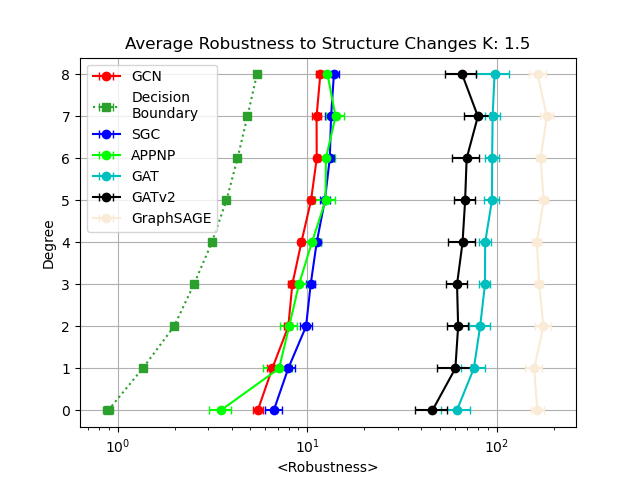

In [4]:
models = ["GCN", "APPNP", "SGC", "GAT", "GATv2", "GraphSAGE"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.starplot(name="f_wrt_y", attack="l2-weak", models=models, 
                            max_degree=8,
                            logplot=True, 
                            K=K, 
                            errorbars=True, 
                            title=title, 
                            ylabel=ylabel,
                            bayes_label = "Decision\nBoundary")

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

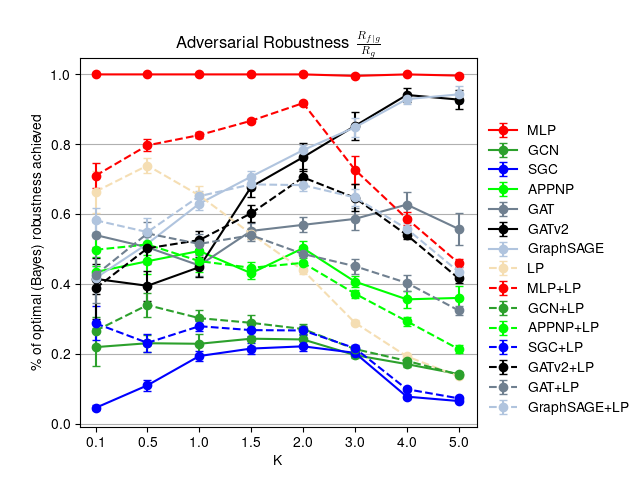

In [12]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GAT", "GAT+LP"]#, "GATv2", "GATv2+LP", "GraphSAGE", "GraphSAGE+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="nettack", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, #budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

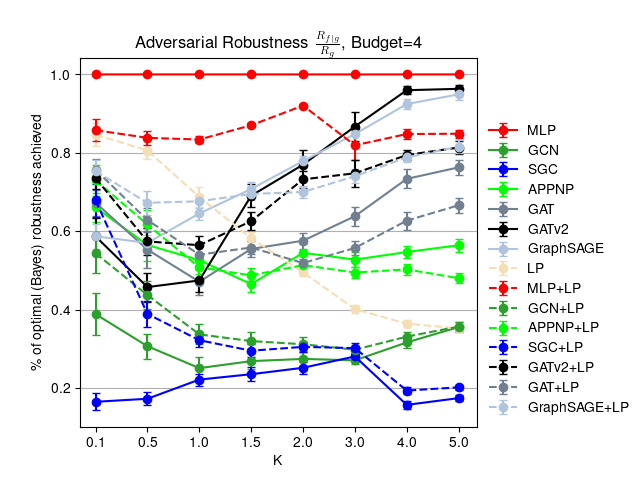

In [17]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GAT", "GAT+LP"]#, "GATv2", "GATv2+LP", "GraphSAGE", "GraphSAGE+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=4"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="nettack", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, budget=4,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

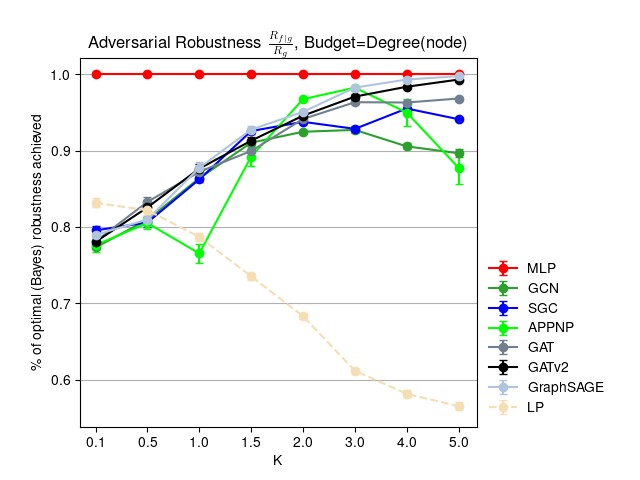

In [31]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=Degree(node)"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="l2-weak", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

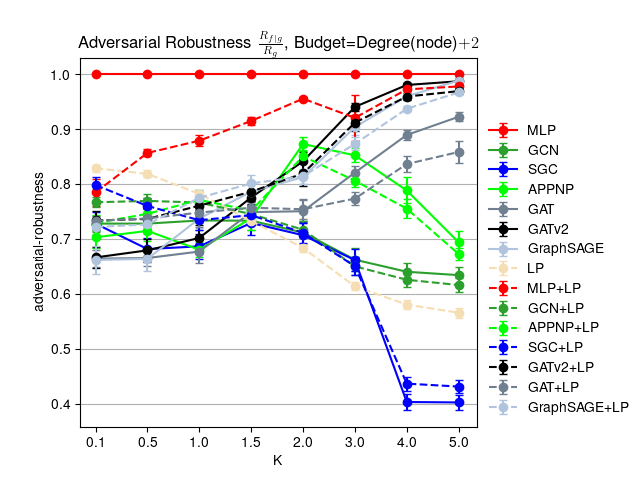

In [26]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=Degree(node)$+2$"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="l2", models=models, 
                        errorbars=True, title=title, spacing="even", 
                        legend_loc="lower left", legend_cols=1, budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

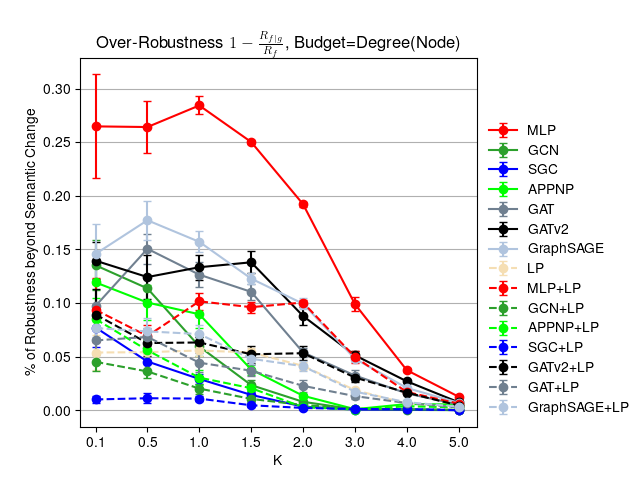

In [41]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Over-Robustness $1 - \frac{R_{f|g}}{R_f}$, Budget=Degree(Node)"
ylabel = "\% of Robustness beyond Semantic Change"
experiment_manager.plot(name="over-robustness-v2", attack="nettack", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

In [ ]:
models = ["GCN", "GAT", "GATv2", "SGC", "APPNP", "GraphSAGE", "MLP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GraphSAGE+LP", "MLP+LP", "SGC+LP"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="nettack", models=models, 
                           errorbars=True, title=title, spacing="even",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

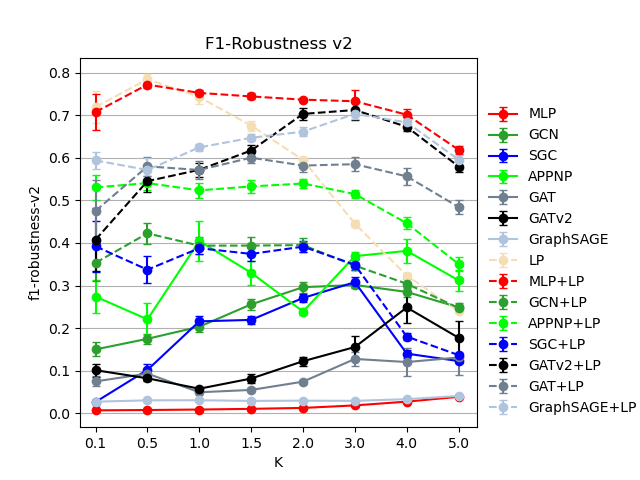

In [72]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP", "MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="nettack", models=models, 
                           errorbars=True, title=title, spacing="even",
                           legend_loc="lower left",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

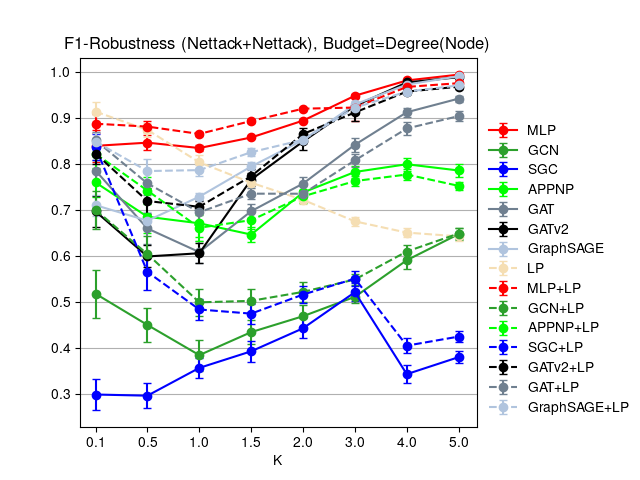

In [53]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = "F1-Robustness (Nettack+Nettack), Budget=Degree(Node)"
ylabel = ""
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="nettack", 
                           attack_advrobustness="nettack", models=models, ylabel=ylabel,
                           errorbars=True, title=title, spacing="even",
                           budget="deg+0", legend_loc="lower left",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

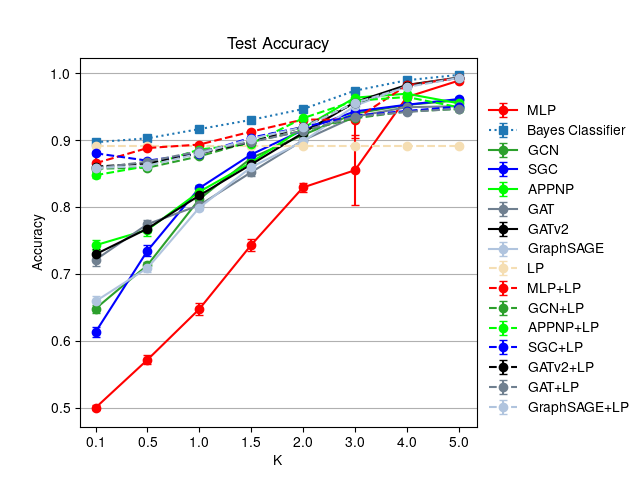

In [57]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "BC","GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Test Accuracy"
ylabel = "Accuracy"
experiment_manager.plot(name="test-accuracy", attack="l2", models=models, 
                        errorbars=True, title=title, ylabel=ylabel,
                        spacing="even", legend_loc="lower left", legend_cols=1,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

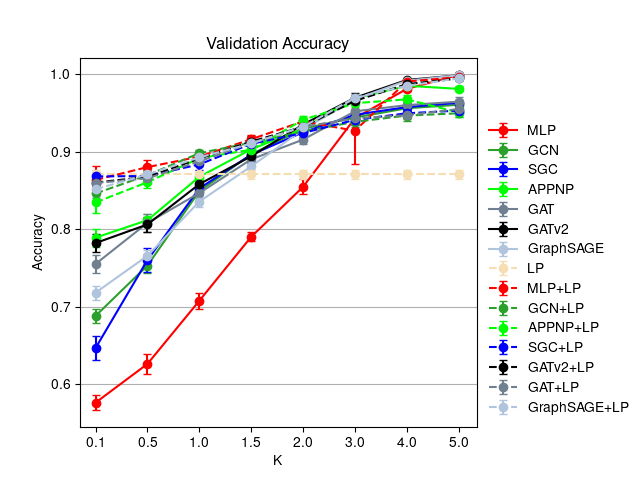

In [58]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Validation Accuracy"
ylabel = "Accuracy"
experiment_manager.plot(name="validation-accuracy", attack="l2", models=models, 
                        errorbars=True, title=title, ylabel=ylabel,
                        spacing="even",legend_loc="lower left", legend_cols=1,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

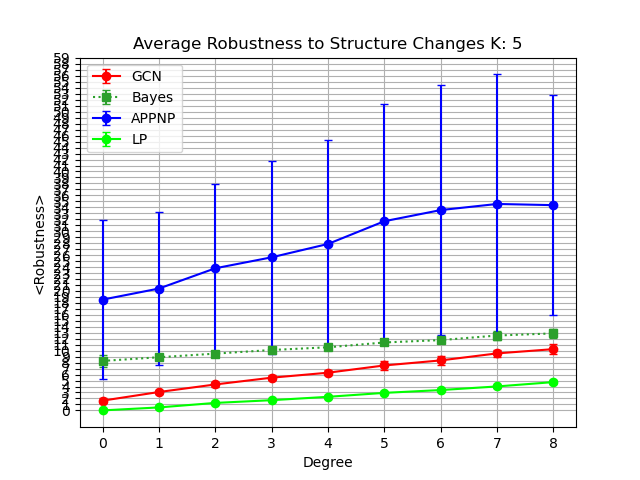

In [16]:
models = ["GCN", "APPNP", "LP"]
ylabel = "<Robustness>"
K = 5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

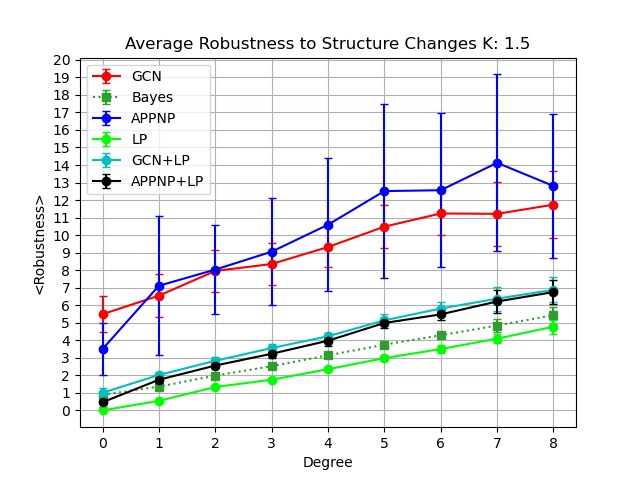

In [17]:
models = ["GCN", "APPNP", "LP", "GCN+LP", "APPNP+LP", "LinearGCN"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

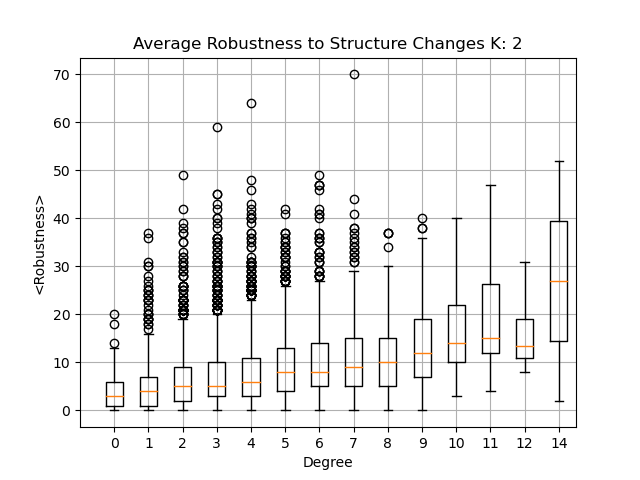

In [18]:
models = ["GCN"]
ylabel = "<Robustness>"
K = 2
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.boxplot_wrt_degree_raw(name="f_wrt_y", attack="l2-weak", models=models, K=K, errorbars=True, title=title, ylabel=ylabel)